HW_8 by 22000690 정이주

1. Objective : Classification

2. Input

  * Toy dataset

3. Output

  * Question class
  * Entropy calculation
  * Information gain
  * Decision Tree
  * Random Forest

### For student code
## STEP1. Make a toy dataset

In [1]:
## Make a toy dataset
train_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
    ['Yellow', 4, 'Lemon']
]

In [2]:
columns = ['color', 'diameter', 'label']

---
## STEP2. Make useful functions 

In [3]:
# Useful function
def unique_vals(rows, col):
  '''
  rows: list of row data
  col: the index of column that we want to find
  '''
  return set([row[col] for row in rows])

### Let's use _unique_vals_ function for finding the unique value!

In [4]:
# Useful function
def class_counts(rows):
    """Counts the number of each type of example in a dataset.
    rows: list of row data
    """
    counts = {}  # a dictionary of label -> count.

    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]

        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

### Let's use _class_counts_ function!

In [5]:
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

### Let's use _is_numeric_ function!

In [6]:
print(is_numeric(7), is_numeric('Blue'))

True False


---
## STEP3. Make a __Question__ class
- <font color='blue'>*Constructors* in python
  - Instantiating an object.  
  - Initialize to the data members of the class when an object of class is created
- <font color='blue'>*__ repr __ function* in python
  - Returns the object representation in string format.

In [7]:
# We need one question on each node
class Question:
    ## Constructor
    def __init__(self, column, value):
        self.column = column
        self.value = value
        
    # We need this function to split the rows based on the question
    def compare_with_question(self, example):
        '''
        Arguments:
        example -- List of row data (EX. ['Blue', 2, 'Blueberry'])
        '''
        
        val = example[self.column]

        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
    ## Python __repr__() function returns the object representation in string format.
    def __repr__(self):
        condition = "=="
        
        if is_numeric(self.value):
            condition = ">="
        return "Is {} {} {}?".format(columns[self.column], condition, str(self.value))

### 💁‍♀️ : Let's implement __Quesetion__ class!

In [8]:
Question(1, 3)

Is diameter >= 3?

In [9]:
Question(0, 'Green')

Is color == Green?

-----
## STEP4. Let's make __partition__ function!

In [10]:
# Split the data based on the question
# Partition function
def partition(rows, question):
    """Partitions a dataset
    Arguments:
    rows -- List of row data
    question -- An object of Question class
    """
    
    true_rows, false_rows = [], []
    
    for row in rows:
        if question.compare_with_question(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

### 💁‍♀️ : If we partition __'train_data'__ with a question  <font color='red'>"Is color == Red🖍",<font color='black'> what is the true_rows and false_rows? 

In [11]:
true_rows, false_rows = partition(train_data, Question(0, 'Red'))

In [12]:
print("The true_rows\n ===> ", true_rows, "\nThe false_rows\n ===> ", false_rows)

The true_rows
 ===>  [['Red', 1, 'Grape'], ['Red', 1, 'Grape']] 
The false_rows
 ===>  [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]


----
## STEP5. Let's calculate __"Entropy"__

In [13]:
import numpy as np
from math import log2, e

In [14]:
## JUST RUN IT!
def entropy(labels, base=None):
    """ Computes entropy of label distribution. 
    Arguments:
    labels -- Lists of data's label 
    """
    
    n_labels = len(labels)
    if n_labels <= 1:
        return 0
    
    counts = class_counts(labels) # return "dict{class_label : counts}"
    probs = [counts[key]/n_labels for key in counts.keys()]
    
    n_classes = np.count_nonzero(probs)
    
    if n_classes <= 1:
        return 0
    
    ent = 0.

  # Compute entropy
  # base = e if base is None else base
    for i in probs:
        ent -= i * log2(i)
        
    return ent

### 💁‍♀️ : In ___pure dataset___, how much entropy value did you get?

In [15]:
## Pure case
pure = [['Apple'],
        ['Apple']]

# this will return 0
entropy(pure)

0

### 💁‍♀️ : In ___impure dataset___, how much entropy value did you get?

In [16]:
## Impure case
impure = [['Apple'],
          ['Orange']]

entropy(impure)

1.0

In [17]:
# Now, we'll look at a dataset with many different labels
impure = [['Apple'],
          ['Orange'],
          ['Grape'],
          ['Grapefruit'],
          ['Blueberry']]

# This will return 2.32
entropy(impure)

2.321928094887362

----
## STEP6. Let's calculate __information gain__

In [18]:
# Information Gain
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    IG = The uncertainty of the starting node - the weighted impurity of two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    
    print("(1) Avg of Impurity = {:.4f} * {:.4f} + {:.4f} * {:.4f}".format(p, entropy(left), 
                                                                           (1-p), entropy(right)))
    print("(2) Current uncertainty = {:.4f}".format(current_uncertainty))

    IG = current_uncertainty - ( p * entropy(left) + (1-p) * entropy(right))
    
    print("(3) Information gain = {:.4f} - ({:.4f} * {:.4f} + {:.4f} * {:.4f})= {:.4f}\n".
          format(current_uncertainty, p, entropy(left), 1-p, entropy(right), IG))

    return IG

In [19]:
# Entropy at the current node
current_uncertainty = entropy(train_data)
print("\nCurrent uncertainty ===> {:.4f}".format(current_uncertainty))


Current uncertainty ===> 1.5850


### 💁‍♀️ : How much information do we gain <font color='green'>by partitioning on 'Green'?

In [20]:
# Information gain for “color==Green”
print('Question? ', Question(0, 'Green'))

true_rows, false_rows = partition(train_data, Question(0, 'Green'))
print("True_rows ===> {}".format(true_rows))
print("False rows ===> {}\n".format(false_rows))

print("\nThe information gain by partitioning on \"Green\" is {:.4f}".format(info_gain(true_rows, false_rows, current_uncertainty)))

Question?  Is color == Green?
True_rows ===> [['Green', 3, 'Apple']]
False rows ===> [['Yellow', 3, 'Apple'], ['Red', 1, 'Grape'], ['Red', 1, 'Grape'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]

(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0.3167


The information gain by partitioning on "Green" is 0.3167


### 💁‍♀️: How much information do we gain <font color='blue'>by partitioning on __diameter >= 3__?

In [21]:
# Information gain for “Diameter >= 3”
print('Question? ', Question(1, 3))

true_rows, false_rows = partition(train_data, Question(1, 3))
print("True_rows ===> {}".format(true_rows))
print("False rows ===> {}\n".format(false_rows))

print("\nThe information gain by partitioning on \"diameter >= 3\" is {:.4f}".format(info_gain(true_rows, false_rows, current_uncertainty)))

Question?  Is diameter >= 3?
True_rows ===> [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]
False rows ===> [['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000)= 0.9183


The information gain by partitioning on "diameter >= 3" is 0.9183


-----
## STEP7. Find **the best split** based on ___Information Gain___

In [22]:
# Find the best split
def find_best_split(rows):
    best_gain = 0
    best_question = None
    
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1
    
    for col in range(n_features):
        
        values = set([row[col] for row in rows])

        for val in values:
            question = Question(col, val)
            true_rows, false_rows = partition(rows, question)
        
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
        
            print('Qustion ====>>> ', question)
            gain = info_gain(true_rows, false_rows, current_uncertainty)
    
            if gain >= best_gain:
                best_gain, best_question = gain, question
        
    return best_gain, best_question

In [23]:
# The information gain of ‘Is diameter >= 3’ is the biggest one.

best_gain, best_question = find_best_split(train_data)

print("The best question ====>>>>> ", best_question)

Qustion ====>>>  Is color == Green?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0.3167

Qustion ====>>>  Is color == Red?
(1) Avg of Impurity = 0.3333 * 0.0000 + 0.6667 * 1.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.3333 * 0.0000 + 0.6667 * 1.0000)= 0.9183

Qustion ====>>>  Is color == Yellow?
(1) Avg of Impurity = 0.5000 * 0.9183 + 0.5000 * 0.9183
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.5000 * 0.9183 + 0.5000 * 0.9183)= 0.6667

Qustion ====>>>  Is diameter >= 3?
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000)= 0.9183

Qustion ====>>>  Is diameter >= 4?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0

----
## STEP8. Let's make a __Decision Tree!__🌲 (JUST RUN IT!)
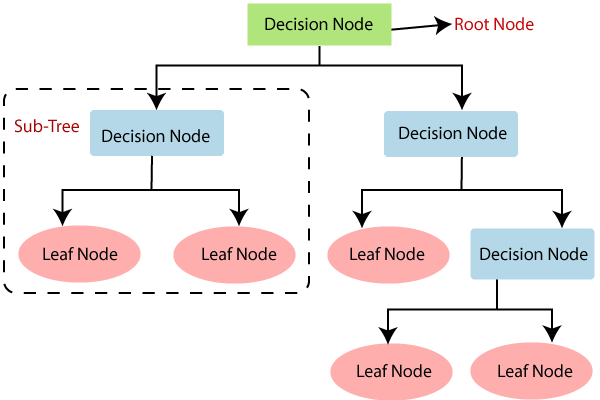

In [24]:
# Make a Decision Tree
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """
    
    def __init__(self, rows):
    ## 'self.predictions' is a dictionary of class counts.
        self.predictions = class_counts(rows)

In [25]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """
    
    def __init__(self,
               question,
               true_branch,
               false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [26]:
def build_tree(rows):
    """Builds the tree.
    Arguments:
    rows --- List of row data
    """
    gain, question = find_best_split(rows)
    ## If information gain is equal to 0, just return the Leaf object.
    
    if gain == 0:
        return Leaf(rows)
    
    true_rows, false_rows = partition(rows, question)
    
    ## Make additional tree nodes
    
    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)
    return Decision_Node(question, true_branch, false_branch)

In [27]:
def print_tree(node, spacing=""):
    """Tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

### 💁‍♀️ : Let's build one _Decision Tree_ !

In [28]:
my_tree = build_tree(train_data)
print(type(my_tree))

Qustion ====>>>  Is color == Green?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0.3167

Qustion ====>>>  Is color == Red?
(1) Avg of Impurity = 0.3333 * 0.0000 + 0.6667 * 1.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.3333 * 0.0000 + 0.6667 * 1.0000)= 0.9183

Qustion ====>>>  Is color == Yellow?
(1) Avg of Impurity = 0.5000 * 0.9183 + 0.5000 * 0.9183
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.5000 * 0.9183 + 0.5000 * 0.9183)= 0.6667

Qustion ====>>>  Is diameter >= 3?
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000)= 0.9183

Qustion ====>>>  Is diameter >= 4?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219)= 0

### 💁‍♀️ : Let's print our ___Decision tree___ !

In [29]:
print(type(my_tree))

<class '__main__.Decision_Node'>


### 💁‍♀️ : Which results do you get when you classify ___'train_data[0]'___,?

In [30]:
def classify(row, node):
    ## If this node is Leaf, return predicted results.
    if isinstance(node, Leaf):
        return node.predictions  ## If you don't know what data is returned, Check "Leaf" class!
    
    if node.question.compare_with_question(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [31]:
## Return the each class counts
classify(train_data[0], my_tree)

{'Apple': 1}

### 💁‍♀️ : Then, Which class is ___'train_data[0]'___ classified into?

In [32]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}

    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
        
    return probs

In [33]:
print_leaf(classify(train_data[0], my_tree))

{'Apple': '100%'}

### ==> _If color is yellow and diameter is 3_, this fruit is predicted 100% 🍎.

-----
## STEP9. Let's test based on our _**Decision Tree**_

In [34]:
#  Test Decision Tree
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [35]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Lemon': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


##STEP10. Visualize the decision tree with library

In [36]:
# Decision Tree with sklearn
from pandas import DataFrame

train_df = DataFrame(testing_data)
train_df.columns = ['color', 'diameter', 'fruit']

In [37]:
from sklearn.preprocessing import LabelEncoder

## You don't have to understand it. Just run it.
encoder = LabelEncoder()
train_df['color'] = encoder.fit_transform(train_df['color'])

[Text(0.3333333333333333, 0.875, 'diameter <= 2.5\nentropy = 1.522\nsamples = 100.0%\nvalue = [0.4, 0.4, 0.2]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 40.0%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.5, 0.625, 'color <= 1.0\nentropy = 0.918\nsamples = 60.0%\nvalue = [0.667, 0.0, 0.333]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 20.0%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.6666666666666666, 0.375, 'diameter <= 3.5\nentropy = 1.0\nsamples = 40.0%\nvalue = [0.5, 0.0, 0.5]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 20.0%\nvalue = [0.0, 0.0, 1.0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 20.0%\nvalue = [1.0, 0.0, 0.0]')]

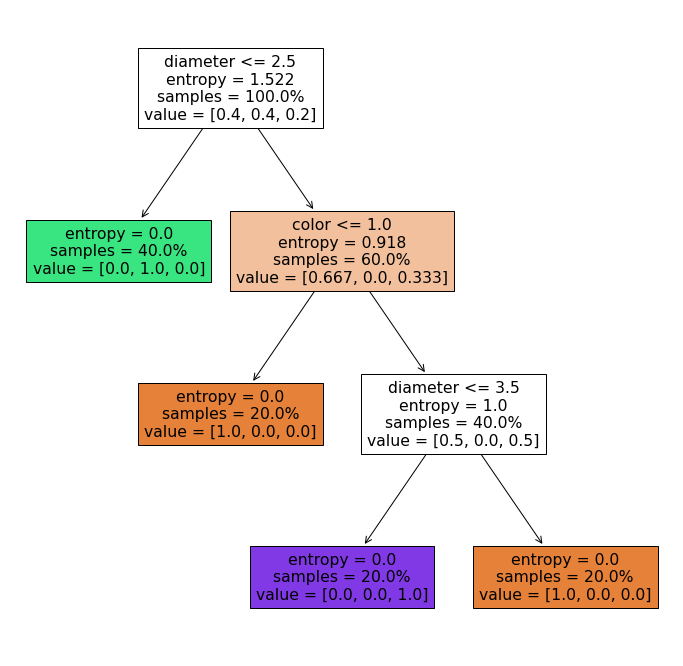

In [38]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn

decisionTree = DecisionTreeClassifier(random_state=0, criterion = "entropy")
decisionTree.fit(train_df.iloc[:, 0:2], train_df.iloc[:, 2])

plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(decisionTree, filled=True, feature_names=["color", "diameter"],proportion=True)

HW_8 by 22000690 정이주

1. Objective : Classification

2. Input

  * mnist.pkl

3. Output

  * rforest test score
  * decisionTree test score
  * decision tree
  * random forest

### student code
## STEP1. Load MNIST data and split into train and test data

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('mnist.pkl', 'rb') as f:  # open file
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [2]:
# make data set
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label']) # get data column name is 'label'
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label']) # get data column name is 'label'

In [3]:
sub_train_x = train_x.iloc[:500, :]
sub_train_y = train_y.iloc[:500]
sub_test_x = test_x.iloc[:100, :]
sub_test_y = test_y.iloc[:100, :]

----
## STEP2 Classify MNIST data using __Decision Tree__🌲 sklearn library 

In [4]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0, criterion="entropy")
decisionTree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [5]:
print("=== > Test set score : {:.2f}".format(decisionTree.score(test_x, test_y)))

=== > Test set score : 0.88


---
## STEP3 Classify MNIST data using __Random Forest__🌲 sklearn library 

In [6]:
from sklearn.ensemble import RandomForestClassifier

## YOUR CODE STARTS HERE
rforest = RandomForestClassifier(random_state=0)
rforest.fit(train_x, train_y)

/var/folders/bl/x_6zsqdn3f33x78knpgzrqvw0000gn/T/ipykernel_978/1948550655.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(train_x, train_y)


RandomForestClassifier(random_state=0)

In [7]:
print("Test set score : {:.2f}".format(rforest.score(test_x, test_y)))

Test set score : 0.97


-----
## STEP4 Visualization of result

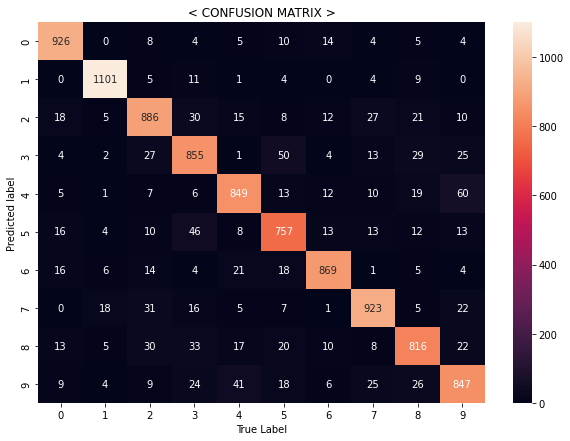

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# decision tree show
pred_y = decisionTree.predict(test_x) # decisionTree predict
cmdtree = confusion_matrix(test_y, pred_y)

plt.figure(figsize=(10,7))
sn.heatmap(cmdtree, annot=True, fmt='d')

plt.title(" < CONFUSION MATRIX > ")
plt.ylabel('Predicted label')
plt.xlabel('True Label')

plt.show()

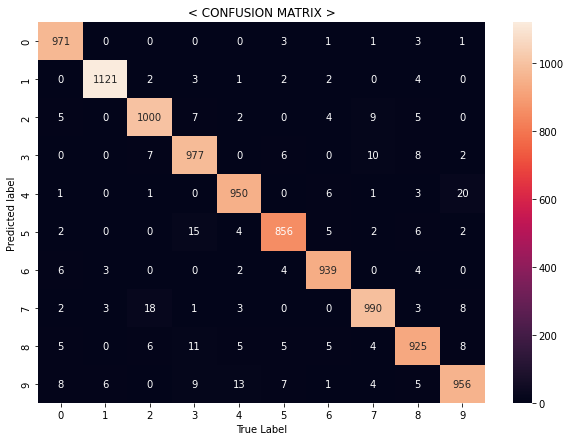

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# rforest show
pred_y = rforest.predict(test_x)  # rforest predict
rtree_cmd = confusion_matrix(test_y, pred_y)

plt.figure(figsize = (10, 7))
sn.heatmap(rtree_cmd, annot=True, fmt='d')

plt.title(" < CONFUSION MATRIX > ")
plt.ylabel('Predicted label')
plt.xlabel('True Label')

plt.show()